**Applied Data Science Lab – Experiment 02
Data Imputation Techniques**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [2]:
data = {
    "Marks": [56, 78, np.nan, 89, 67, np.nan, 88, 90, 54, 61],
    "Study_Hours": [2.5, 4.0, 1.8, np.nan, 3.1, 3.5, np.nan, 5.5, 2.2, 2.8],
    "Attendance": [75, 85, 65, 92, np.nan, 82, 90, 95, 70, np.nan],
    "Grade": ["C", "B", "D", "A", "C", "B", np.nan, "A", "D", "C"]
}

df = pd.DataFrame(data)
df

,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
2,NaN,1.8,65.0,D
3,89.0,NaN,92.0,A
4,67.0,3.1,NaN,C
5,NaN,3.5,82.0,B
6,88.0,NaN,90.0,NaN
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D
9,61.0,2.8,NaN,C


In [3]:
df.isnull().sum()

,0
Marks,2
Study_Hours,2
Attendance,2
Grade,1


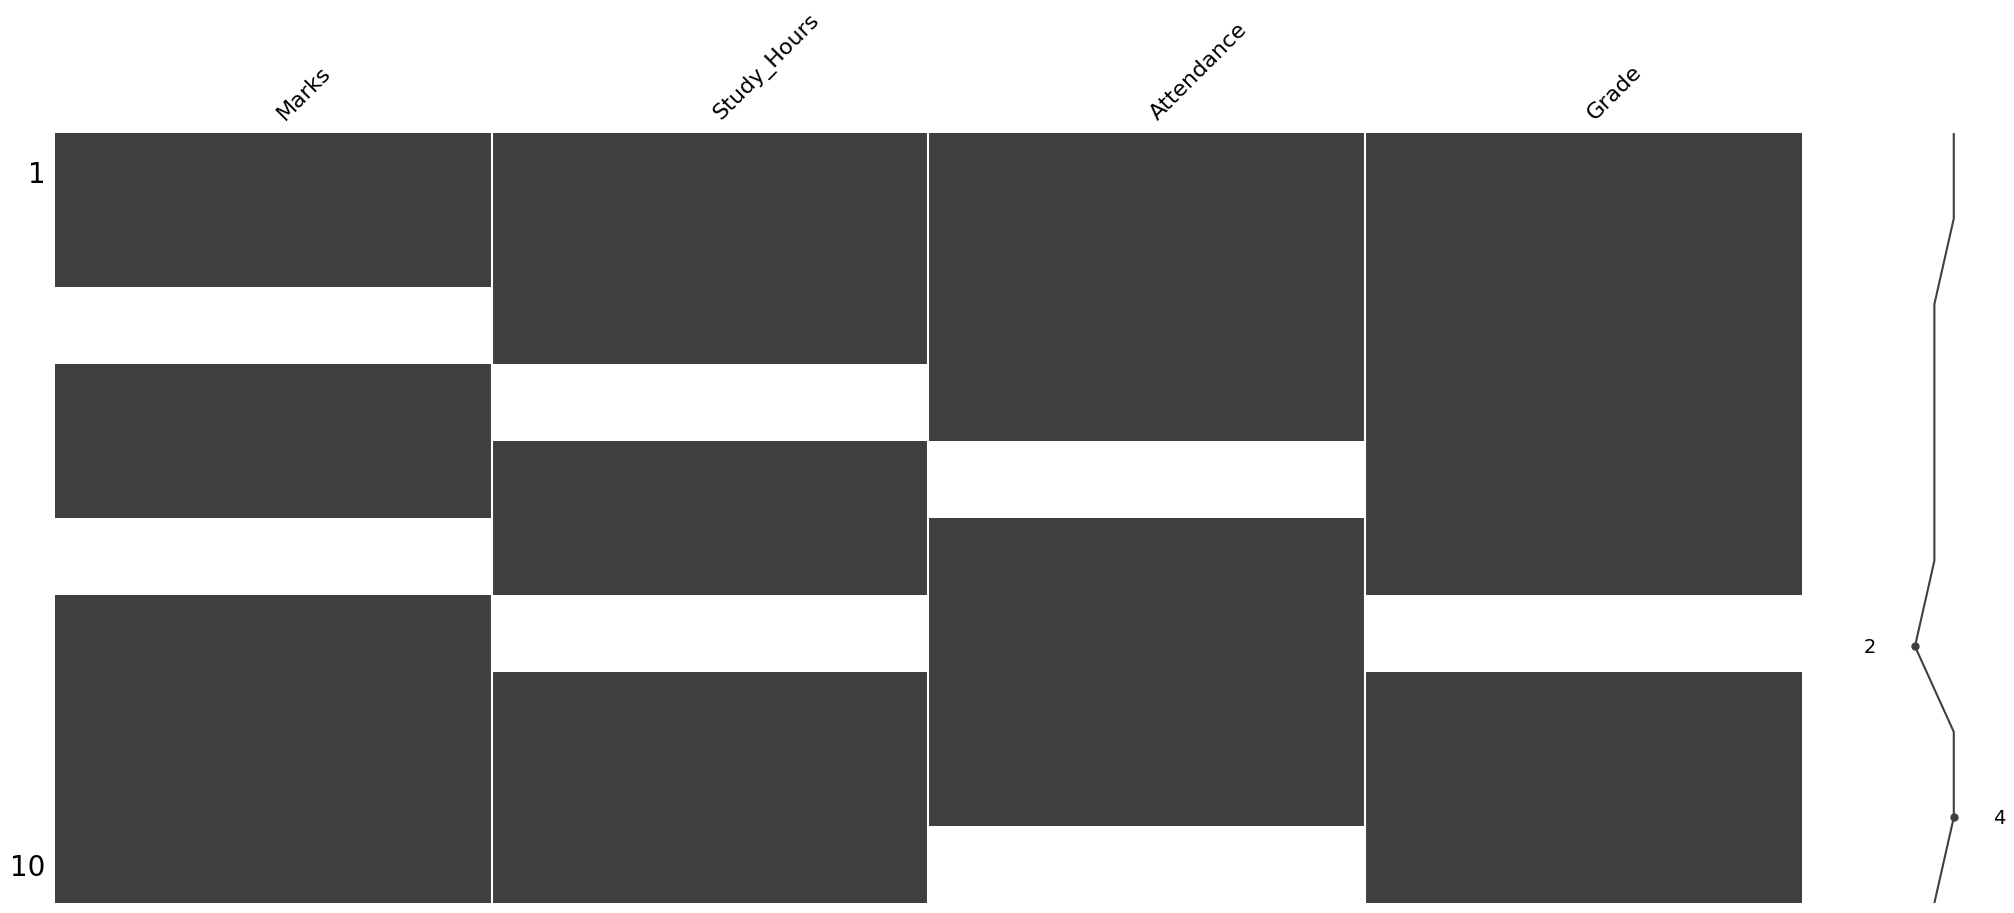

In [4]:
msno.matrix(df)
plt.show()

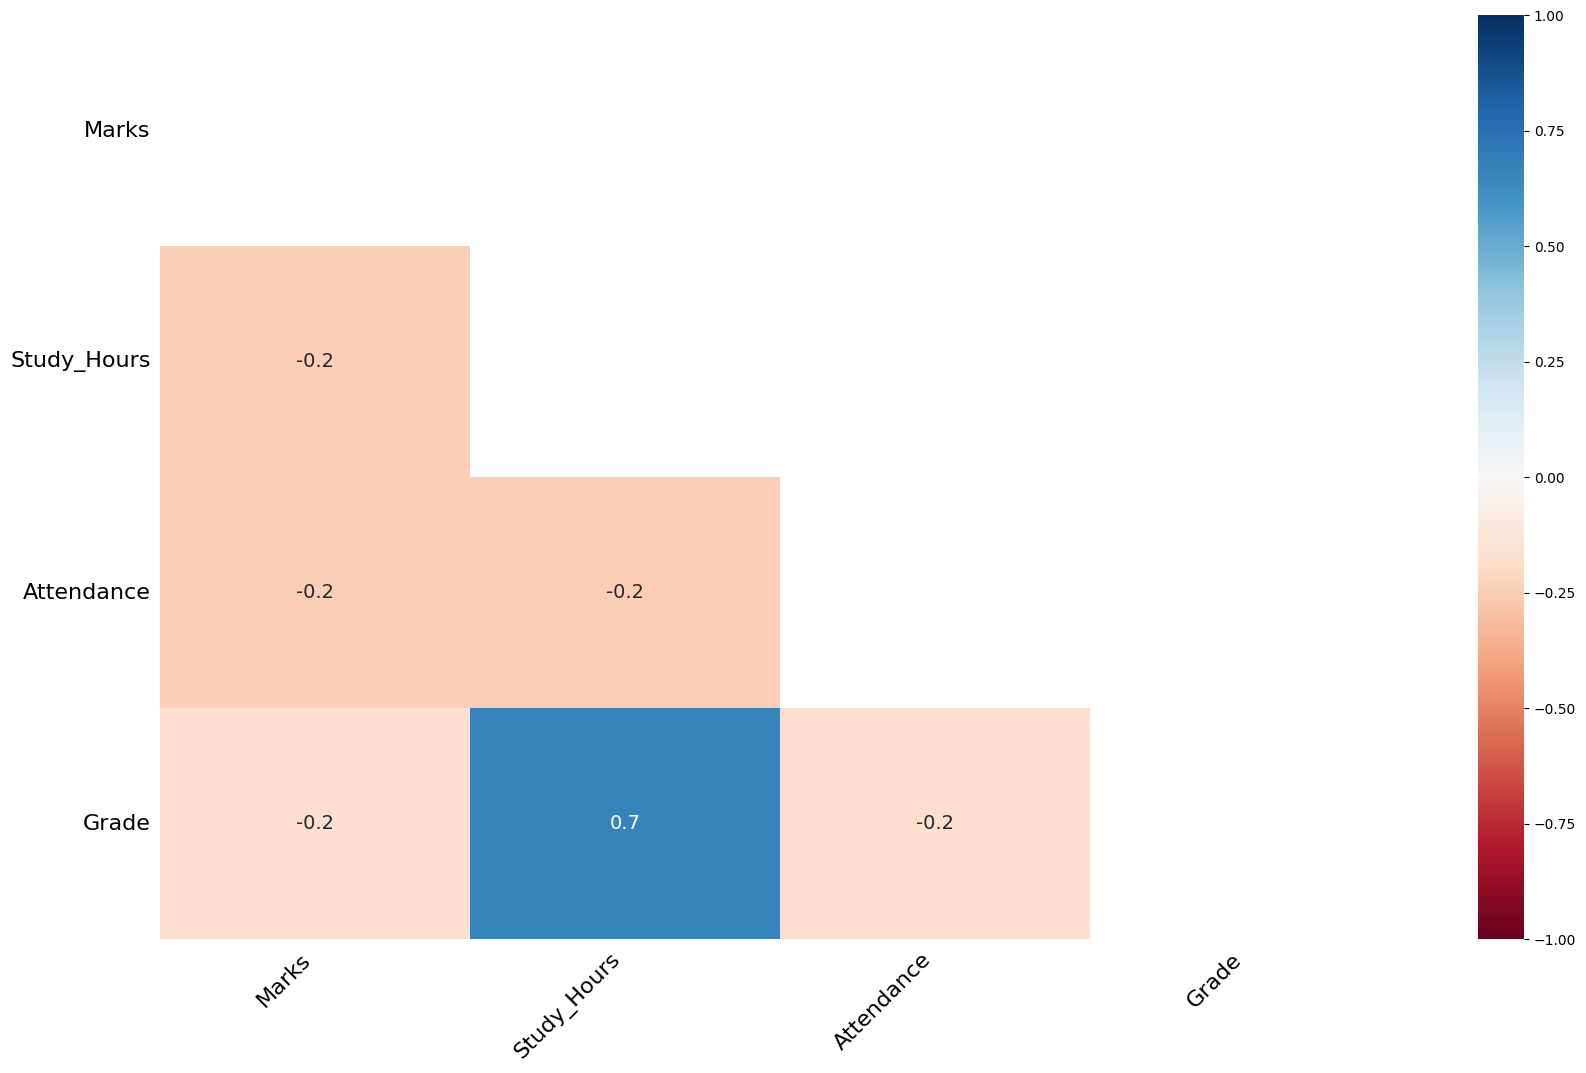

In [5]:
msno.heatmap(df)
plt.show()

In [6]:
df_drop = df.dropna()
df_drop

,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D


In [7]:
mean_imputer = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean[['Marks','Study_Hours','Attendance']] = mean_imputer.fit_transform(
    df[['Marks','Study_Hours','Attendance']]
)
df_mean

,Marks,Study_Hours,Attendance,Grade
0,56.000,2.500,75.00,C
1,78.000,4.000,85.00,B
2,72.875,1.800,65.00,D
3,89.000,3.175,92.00,A
4,67.000,3.100,81.75,C
5,72.875,3.500,82.00,B
6,88.000,3.175,90.00,NaN
7,90.000,5.500,95.00,A
8,54.000,2.200,70.00,D
9,61.000,2.800,81.75,C


In [8]:
median_imputer = SimpleImputer(strategy='median')
df_median = df.copy()
df_median[['Marks','Study_Hours','Attendance']] = median_imputer.fit_transform(
    df[['Marks','Study_Hours','Attendance']]
)
df_median

,Marks,Study_Hours,Attendance,Grade
0,56.0,2.50,75.0,C
1,78.0,4.00,85.0,B
2,72.5,1.80,65.0,D
3,89.0,2.95,92.0,A
4,67.0,3.10,83.5,C
5,72.5,3.50,82.0,B
6,88.0,2.95,90.0,NaN
7,90.0,5.50,95.0,A
8,54.0,2.20,70.0,D
9,61.0,2.80,83.5,C


In [9]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode = df.copy()
df_mode[['Grade']] = mode_imputer.fit_transform(df[['Grade']])
df_mode

,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
2,NaN,1.8,65.0,D
3,89.0,NaN,92.0,A
4,67.0,3.1,NaN,C
5,NaN,3.5,82.0,B
6,88.0,NaN,90.0,C
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D
9,61.0,2.8,NaN,C


In [10]:
df_arbitrary = df.copy()
df_arbitrary['Marks'].fillna(0, inplace=True)
df_arbitrary

/tmp/ipython-input-4117825012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_arbitrary['Marks'].fillna(0, inplace=True)


,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
2,0.0,1.8,65.0,D
3,89.0,NaN,92.0,A
4,67.0,3.1,NaN,C
5,0.0,3.5,82.0,B
6,88.0,NaN,90.0,NaN
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D
9,61.0,2.8,NaN,C


In [11]:
max_marks = df['Marks'].max()
df_tail = df.copy()
df_tail['Marks'].fillna(max_marks + 1, inplace=True)
df_tail

/tmp/ipython-input-3467732524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tail['Marks'].fillna(max_marks + 1, inplace=True)


,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
2,91.0,1.8,65.0,D
3,89.0,NaN,92.0,A
4,67.0,3.1,NaN,C
5,91.0,3.5,82.0,B
6,88.0,NaN,90.0,NaN
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D
9,61.0,2.8,NaN,C


In [12]:
df_random = df.copy()
random_sample = df['Marks'].dropna().sample(df['Marks'].isnull().sum(), random_state=0)
df_random.loc[df_random['Marks'].isnull(), 'Marks'] = random_sample.values
df_random

,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
2,54.0,1.8,65.0,D
3,89.0,NaN,92.0,A
4,67.0,3.1,NaN,C
5,89.0,3.5,82.0,B
6,88.0,NaN,90.0,NaN
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D
9,61.0,2.8,NaN,C


In [13]:
df_freq = df.copy()
df_freq['Grade'].fillna(df['Grade'].mode()[0], inplace=True)
df_freq

/tmp/ipython-input-1389902797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_freq['Grade'].fillna(df['Grade'].mode()[0], inplace=True)


,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
2,NaN,1.8,65.0,D
3,89.0,NaN,92.0,A
4,67.0,3.1,NaN,C
5,NaN,3.5,82.0,B
6,88.0,NaN,90.0,C
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D
9,61.0,2.8,NaN,C


In [14]:
df_new_cat = df.copy()
df_new_cat['Grade'].fillna("Missing", inplace=True)
df_new_cat

/tmp/ipython-input-4044240333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_cat['Grade'].fillna("Missing", inplace=True)


,Marks,Study_Hours,Attendance,Grade
0,56.0,2.5,75.0,C
1,78.0,4.0,85.0,B
2,NaN,1.8,65.0,D
3,89.0,NaN,92.0,A
4,67.0,3.1,NaN,C
5,NaN,3.5,82.0,B
6,88.0,NaN,90.0,Missing
7,90.0,5.5,95.0,A
8,54.0,2.2,70.0,D
9,61.0,2.8,NaN,C


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

df_reg = df.copy()

train = df_reg[df_reg['Marks'].notnull()]
test = df_reg[df_reg['Marks'].isnull()]

X_train = train[['Study_Hours','Attendance']]
y_train = train['Marks']

X_test = test[['Study_Hours','Attendance']]

# 🔹 FIX: Impute missing values in predictors
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

df_reg.loc[df_reg['Marks'].isnull(), 'Marks'] = model.predict(X_test)
df_reg

,Marks,Study_Hours,Attendance,Grade
0,56.000000,2.5,75.0,C
1,78.000000,4.0,85.0,B
2,41.331521,1.8,65.0,D
3,89.000000,NaN,92.0,A
4,67.000000,3.1,NaN,C
5,69.508034,3.5,82.0,B
6,88.000000,NaN,90.0,NaN
7,90.000000,5.5,95.0,A
8,54.000000,2.2,70.0,D
9,61.000000,2.8,NaN,C


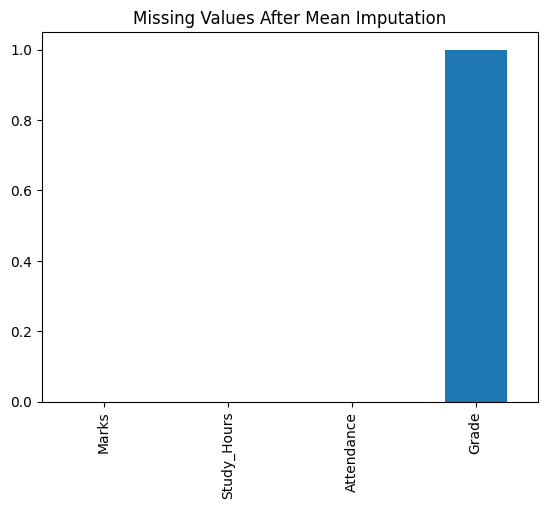

In [17]:
df_mean.isnull().sum().plot(kind='bar')
plt.title("Missing Values After Mean Imputation")
plt.show()

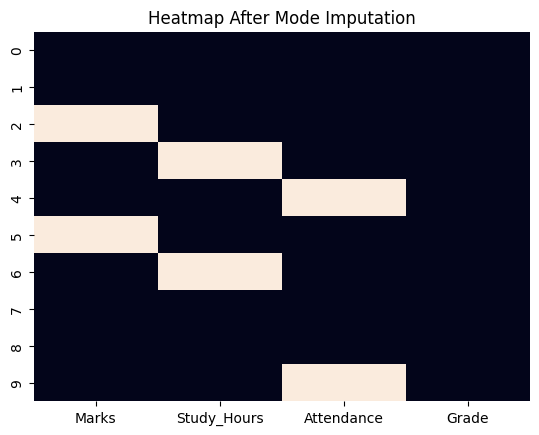

In [21]:
sns.heatmap(df_mode.isnull(), cbar=False)
plt.title("Heatmap After Mode Imputation")
plt.show()